In [10]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruido em imagens

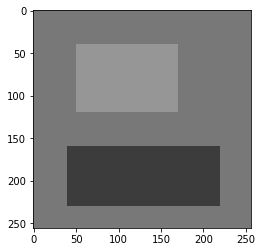

In [11]:
def make_test_image():
    img_test = np.zeros([256, 256], dtype=np.uint8)
    img_test[:,:] = 120
    img_test[40:120, 50:170] = 150
    img_test[160:230, 40:220] = 60
    return img_test

img_test = make_test_image()
plt.imshow(img_test, cmap='gray', vmin=0, vmax=255)

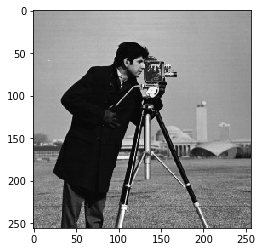

In [12]:
img_cameraman = cv2.cvtColor(cv2.imread('cameraman.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(img_cameraman, cmap='gray', vmin=0, vmax=255)

In [13]:
def add_noise(img, sigma):
    img_noise = np.random.normal(loc=0.0, scale=sigma, size=img.shape)
    return np.clip(img + img_noise, 0, 255).astype('uint8')

def run_test_noise(img_test, sigma=5.0):
    img_test_noise = add_noise(img_test, sigma)
    hist = cv2.calcHist([img_test_noise],[0],None,[256],[0,256])

    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(img_test_noise, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122)
    plt.title('sigma = {}'.format(sigma))
    plt.plot(hist)
    plt.show()

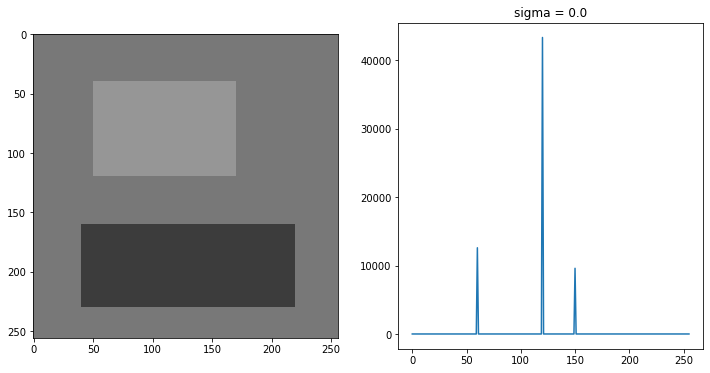

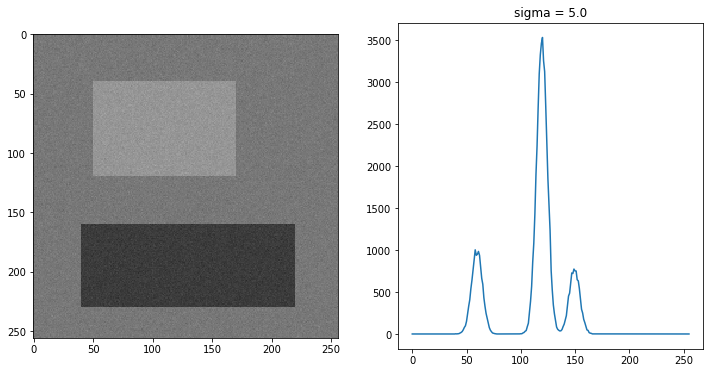

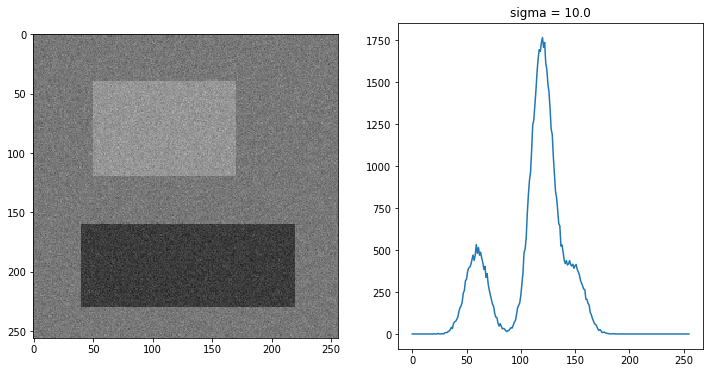

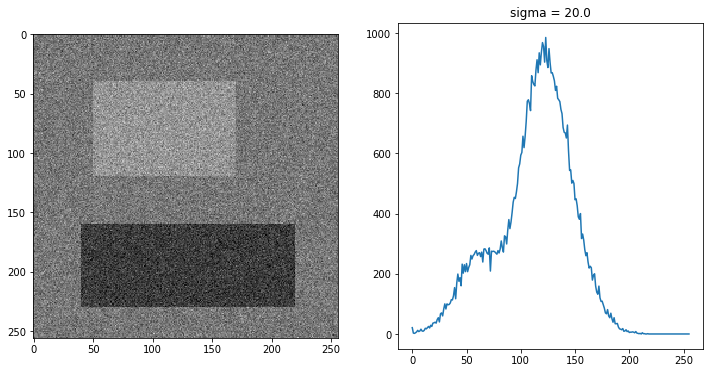

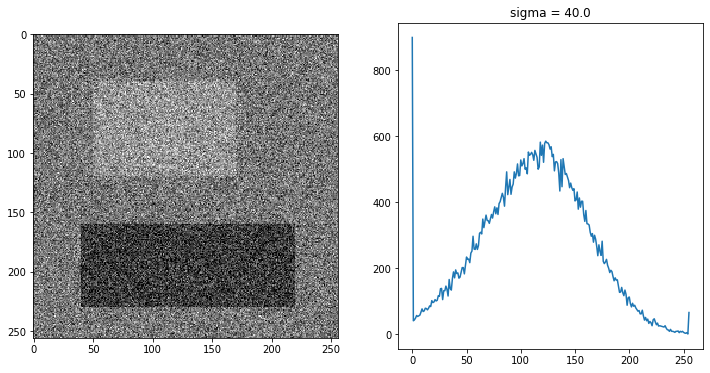

In [14]:
for sigma in [0.0, 5.0, 10.0, 20.0, 40.0]:
    run_test_noise(img_test, sigma)

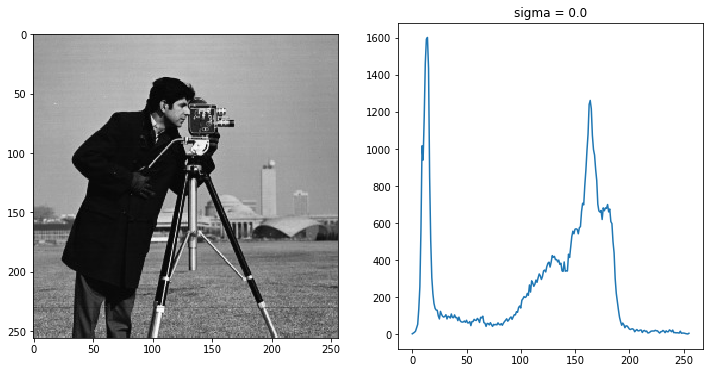

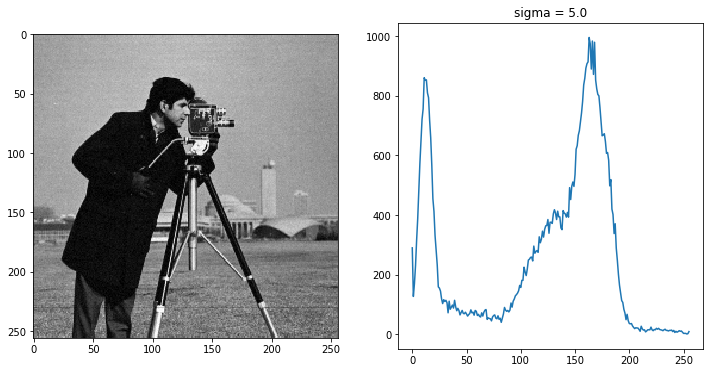

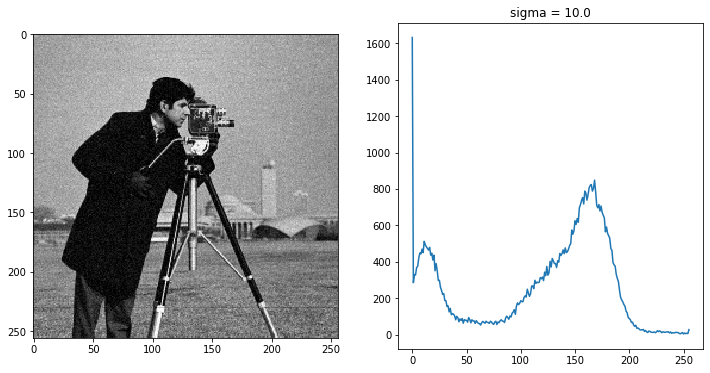

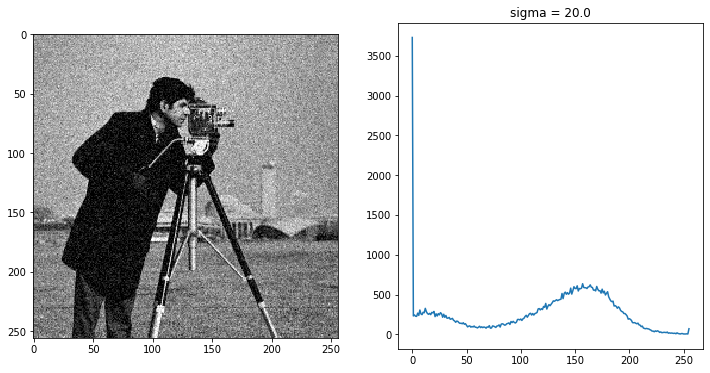

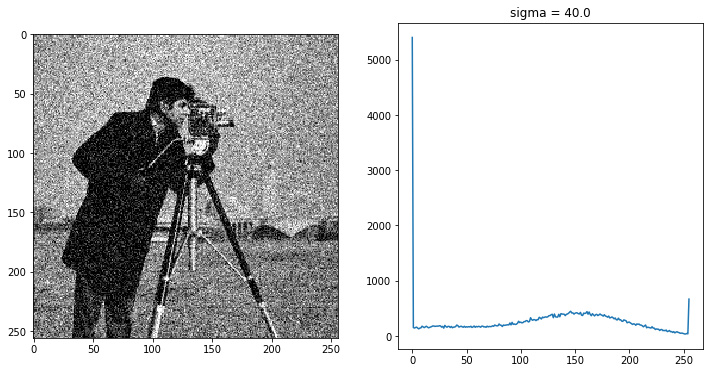

In [15]:
for sigma in [0.0, 5.0, 10.0, 20.0, 40.0]:
    run_test_noise(img_cameraman, sigma)

**Atividade**

Construa dois exemplos de imagem com ruido a partir da imagem de teste: uma versão com pouco ruído e outra com muito ruido. Nos dois casos, tente segmentar por limiar o retângulo claro.

# Filtros espaciais

In [16]:
class SmoothingExperiment:
    BASE_SIZE = 4

    def __init__(self, img_test, size, sigma):
        img_noisy = add_noise(img_test, sigma=sigma)
        img_blur = cv2.blur(img_noisy, (size,size))
        img_GaussianBlur = cv2.GaussianBlur(img_noisy,(size,size),0)
        img_medianBlur = cv2.medianBlur(img_noisy, size)        
        self.imgs = {
            'orig': img_test.copy(),
            'noisy': img_noisy,
            'blur': img_blur,
            'gaussian': img_GaussianBlur,
            'median': img_medianBlur
        }

    def show(self, y=None, zoom=None):
        i = 1
        plt.figure(figsize=(3*SmoothingExperiment.BASE_SIZE, 
                            len(self.imgs)*SmoothingExperiment.BASE_SIZE))
        for name, img in self.imgs.items():
            if zoom:
                img = img[zoom[0]:zoom[1], zoom[2]:zoom[3]]
                
            height, width = img.shape
            if not y:
                y = height // 2
                        
            # Plot image.
            plt.subplot(5, 3, i)
            i += 1
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
            plt.plot([0, width-1], [y, y])
            
            # Plot histogram.
            hist = cv2.calcHist([img],[0],None,[256],[0,256])

            plt.subplot(5, 3, i)
            i += 1
            plt.title(name)
            plt.plot(hist)
            
            # Plot profile.
            profile = img[y,:]
            
            plt.subplot(5, 3, i)
            i += 1
            plt.plot(profile)

        plt.show()

In [17]:
test_smoothing = SmoothingExperiment(img_test, size=11, sigma=20.0)

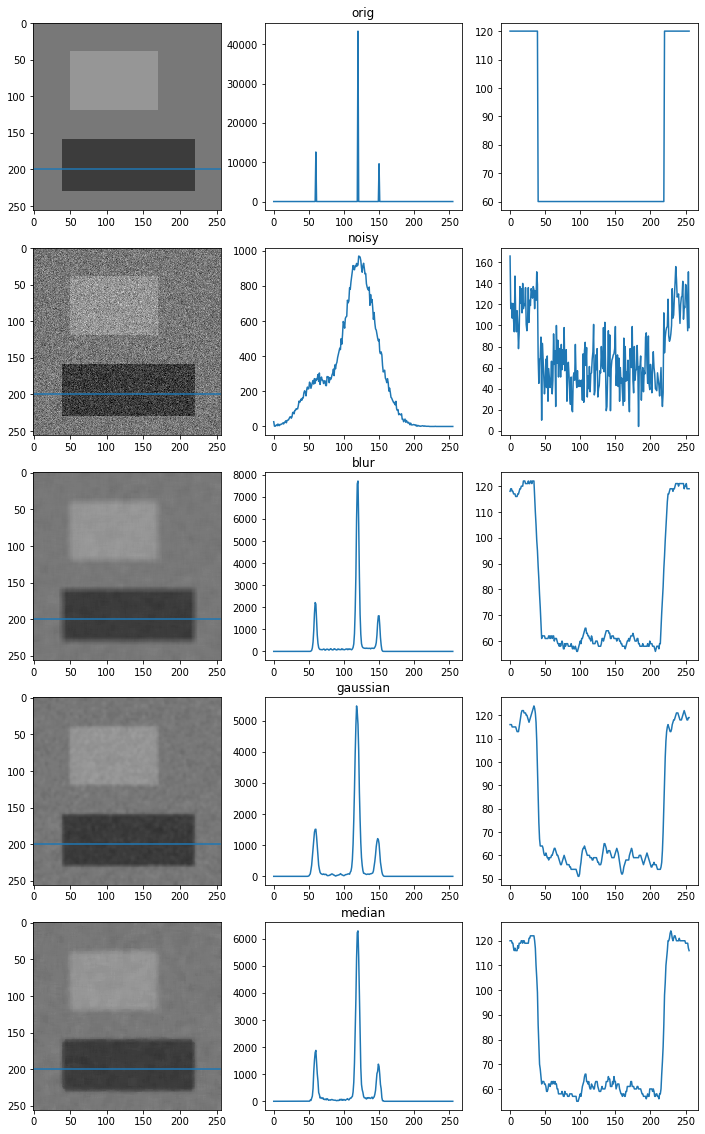

In [18]:
test_smoothing.show(y=200)

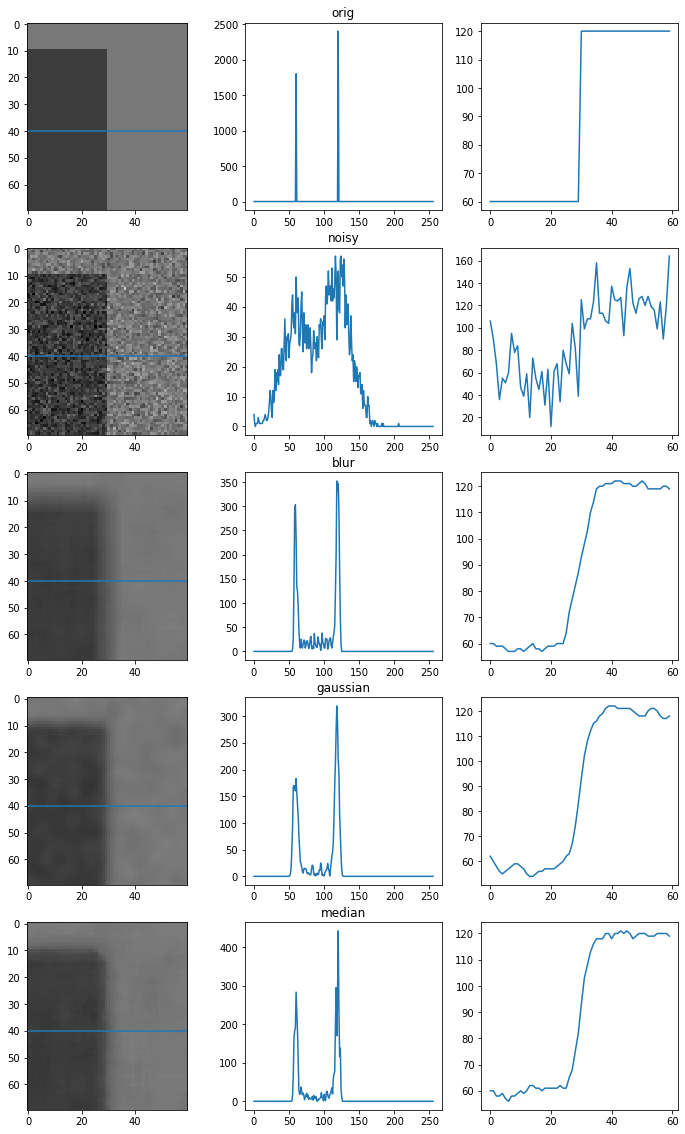

In [19]:
test_smoothing.show(y=40, zoom=(150, 220, 190, 250))  # zoom=(ymin, ymax, xmin, xmax)

In [20]:
test_cameraman = SmoothingExperiment(img_cameraman, size=3, sigma=10.0)

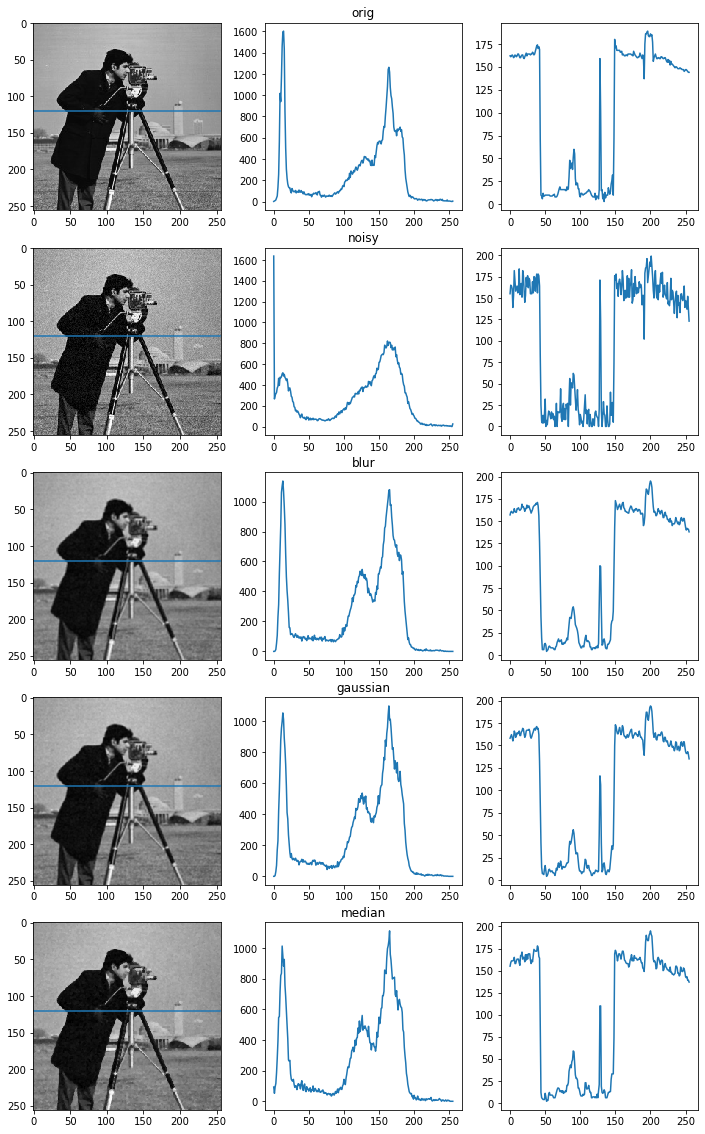

In [21]:
test_cameraman.show(y=120)

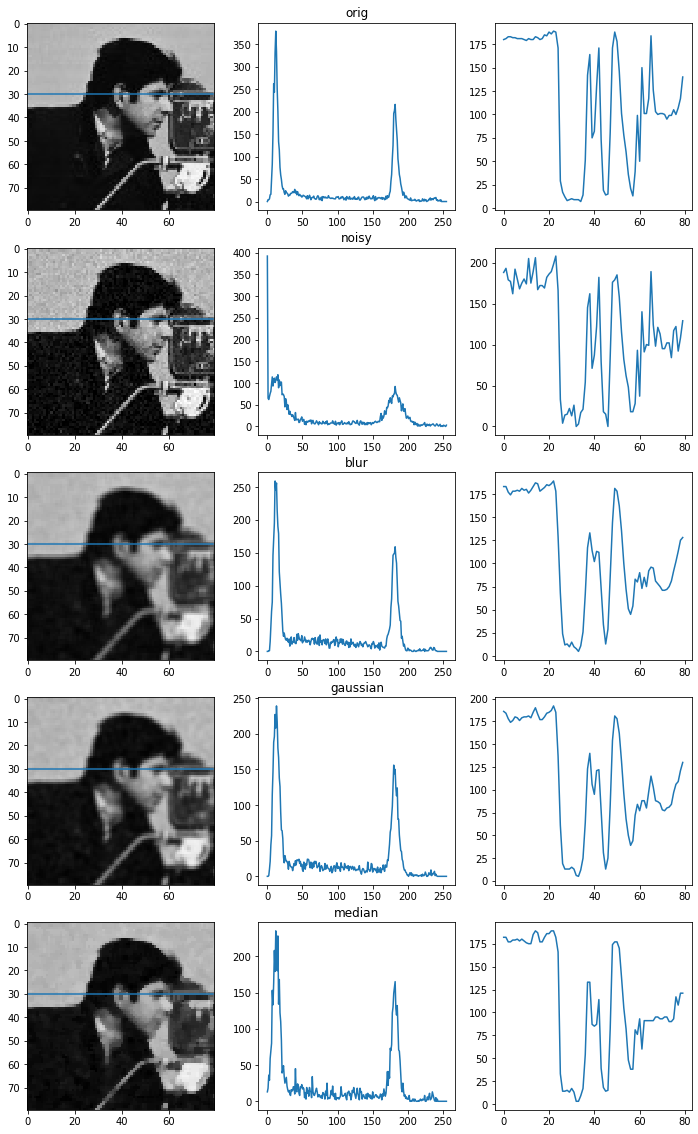

In [22]:
test_cameraman.show(y=30, zoom=(30, 110, 70, 150))

## Atividade

Para os casos de teste que você construiu anteriormente, mostre o efeito da filtragem espacial e como ela ajuda ou atrapalha a segmentação por limiar. Explore:

- Filtro de média versus filtro de mediana
- Diferentes tamanhos de filtro

# Filtros de gradiente

In [23]:
# Baseado no material do tutorial do OpenCV: 
# https://docs.opencv.org/3.4.2/d5/d0f/tutorial_py_gradients.html
img = cv2.cvtColor(cv2.imread('sudoku-original.jpg'), cv2.COLOR_BGR2GRAY)
img_laplacian = cv2.Laplacian(img, cv2.CV_64F)
img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_sobelx, cmap='gray')
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_sobely, cmap='gray')
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])
plt.show()

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# Canny edge detection

In [ ]:
img_canny = cv2.Canny(img, 100, 200)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(img_canny, cmap='gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])

plt.show()